In [2]:
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [3]:
train_data= pd.read_csv("D://digit recognation//train.csv")
test_data=pd.read_csv("D://digit recognation//test.csv")

In [4]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#splitting the train data into input and output
x_train=train_data.drop('label', axis=1) #input 
y_train=train_data['label']  #output 
x_train=x_train/255
x_train=x_train.values.reshape(-1,28,28,1)


In [8]:
#splitting train dataset into train and validation 
X_train, X_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42,shuffle=True)

In [9]:
x_train[3]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
y_train[3]

4

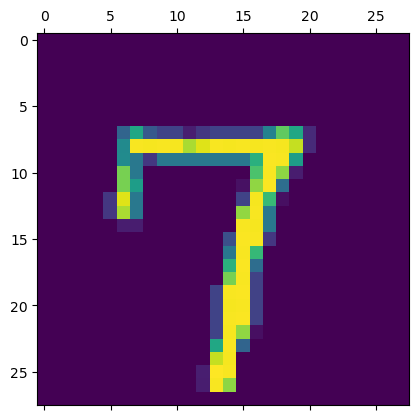

In [11]:
img = np.reshape(x_train[6], (28, 28))
plt.matshow(img)

In [12]:
y_train[6]

7

In [13]:
# Split the test data into feature and output
X_test = test_data
X_test=X_test/255.0
X_test=X_test.values.reshape(-1,28,28,1)

# bulding the model  

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [15]:
history=model.fit(X_train, y_train, epochs=15,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
1050/1050 [==============================] - 77s 64ms/step - loss: 0.2944 - accuracy: 0.9088 - val_loss: 0.0597 - val_accuracy: 0.9825
Epoch 2/15
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0899 - accuracy: 0.9759 - val_loss: 0.0505 - val_accuracy: 0.9863
Epoch 3/15
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0717 - accuracy: 0.9808 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 4/15
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0628 - accuracy: 0.9839 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 5/15
1050/1050 [==============================] - 67s 63ms/step - loss: 0.0595 - accuracy: 0.9844 - val_loss: 0.0604 - val_accuracy: 0.9851
Epoch 6/15
1050/1050 [==============================] - 67s 64ms/step - loss: 0.0564 - accuracy: 0.9859 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 7/15
1050/1050 [==============================] - 68s 65ms/step - loss: 0.0569 - accuracy: 0.9859 - val_loss: 0.0395 -

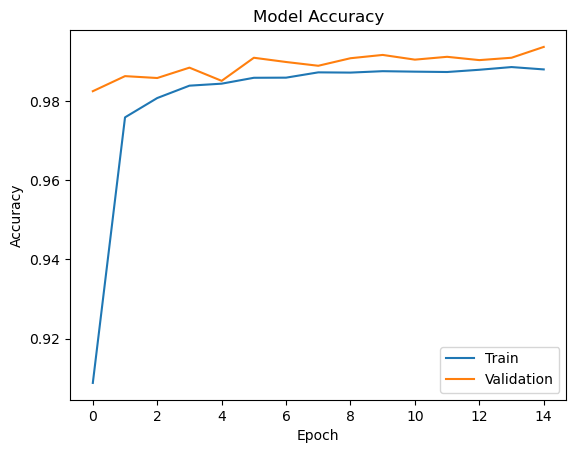

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

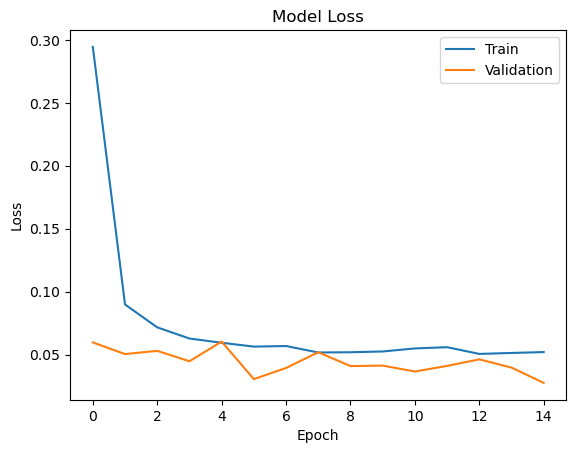

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [41]:
prediction = model.predict(X_test)

875/875 [==============================] - 11s 12ms/step


In [42]:
print("Shape of prediction:", prediction.shape)

Shape of prediction: (28000, 10)


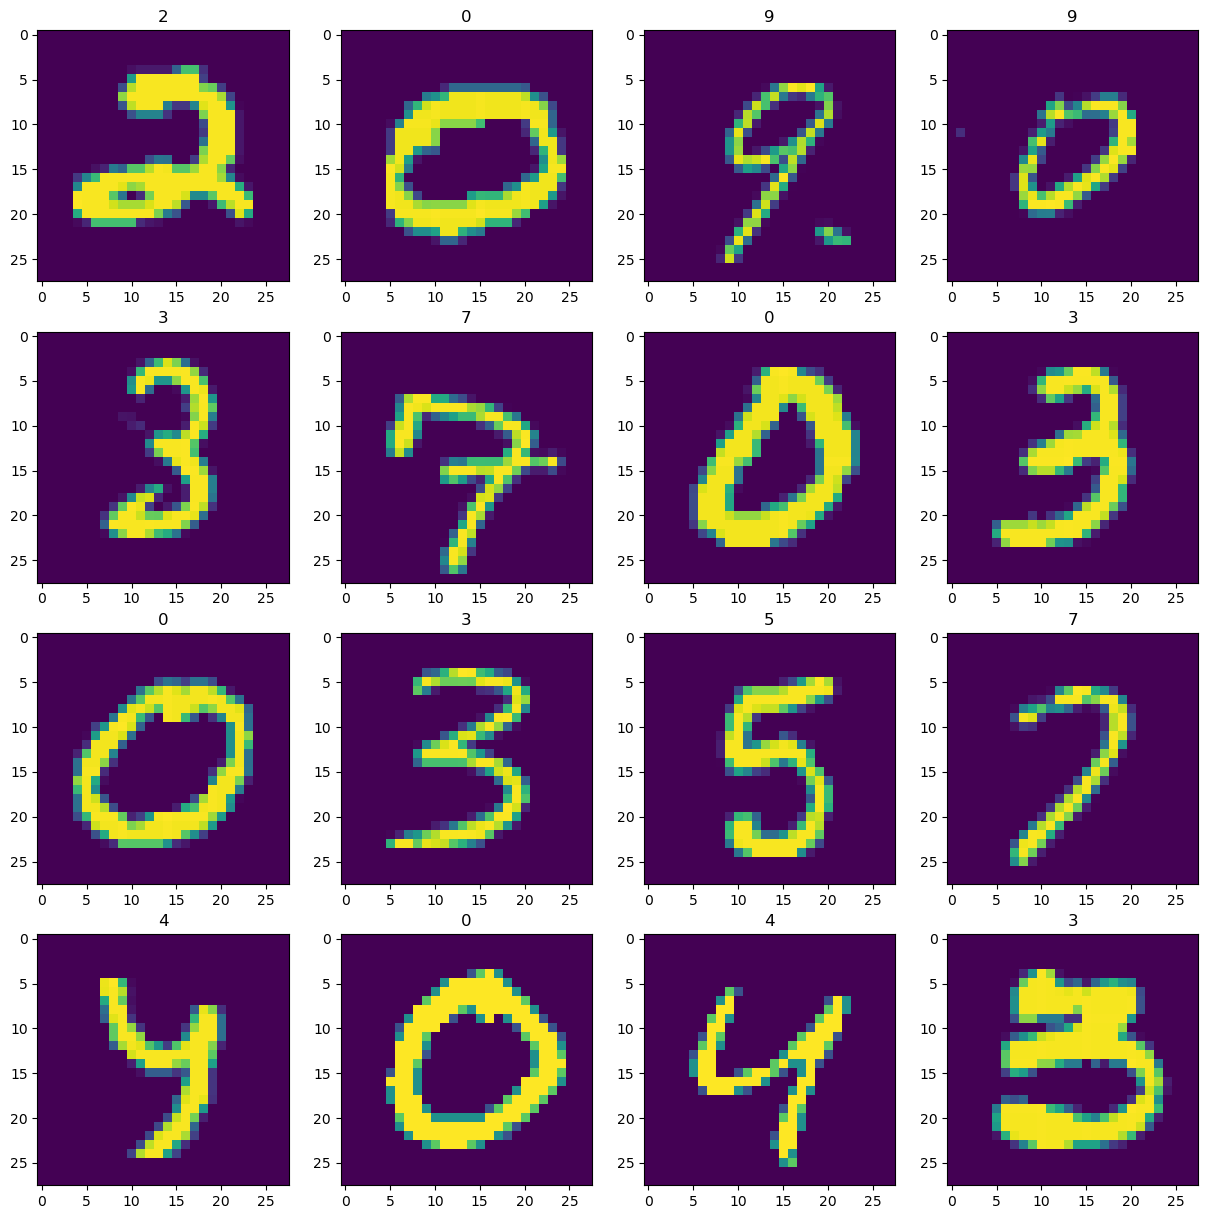

In [46]:
ImgPredList= [np.argmax(prediction[x]) for x in range(60)]

plt.figure(figsize=(15,15))

for i in range (16):
    plt.subplot(4, 4, i+1)
    img = np.reshape(X_test[i], (28, 28))
    plt.imshow(img)
    plt.title(ImgPredList[i])
plt.show()